<h1> An Analysis into <b>The Prisoner's Dilemma</b><h1>

The prisoner's dilemma is a situation in <b>game theory</b> which shows how rational individuals might not cooperate (even if it is in their best interests to do so) and acting selfishly will lead to a suboptimal choice for both players. This paradox is often used by researchers to model and investigate how people decide to cooperate in certain markets. The prisoner's dilemma is usually studied when it is conducted as a <b>repeated game</b> which captures the idea that a player will have to take the consequences of their actions (sometimes known as their reputation) into account as this may affect the current and future actions of other players. 

<b>Problem:</b> <i>Two prisoners are on trial for a crime and each one faces a choice of confessing to the crime or remaining silent. If they both remain silent, the authorities will not be able to prove charges against them and they will both serve a short prison term, say 2 years, for minor offenses. If only one of them confesses, his term will be reduced to 1 year and he will be used as a witness against the other, who in turn will get a sentence of 5 years. Finally if they both confess, they both will get a small break for cooperating with the authorities and will have to serve prison sentences of 4 years each (rather than 5). </i>

The Prisoner's Dilemma can be expressed as a pair of matrices as seen below:
$$A = \begin{bmatrix} 4 & 1 \\ 5 & 2 \end{bmatrix} B = \begin{bmatrix} 4 & 5 \\ 1 & 2 \end{bmatrix} $$

This can also be expressed more clearly as a payoff matrix:
<table>
<thead>
<tr>
<th>  </th>
<th>C</th>
<th>D</th>
</tr>
</thead>
<tbody>
<tr>
<td>C</td>
<td>4,4</td>
<td>1,5</td>
</tr>
<tr>
<td>D</td>
<td>5,1</td>
<td>2,2</td>
</tr>
</tbody>
</table>

We can describe all possible outcomes using these matrices:
- If A and B defect, they will both get a sentence of **4** years.
- If A defects and B cooperates, then A will get a reduced sentences of **1** year and B will get a sentence of **5** years.
- Similarly, if A cooperates and B defects, then A will get a sentence of **5** years and B will get a reduced sentence of **1** year.
- If A and B co-operate, they will both get a sentence of **2** years.

A more general form would be:
$$A = \begin{bmatrix} R & S \\ T & P \end{bmatrix} B = \begin{bmatrix} R & T \\ S & P \end{bmatrix} $$
with the constraints:
$$T > R > P > S$$
$$2R > T + S$$
- The first constraint means that *defecting* is more dominant than *cooperating*.
- The second constraint ensures that the sum of utilities to both players is best when they both *cooperate*.

<h2> Indefinite Iteration </h2>

The Prisoner's Dilemma becomes much more interesting when discussing the iterated version of the game (where the game is played more than once). Interest in this version of the game rised in the 80s, where Robert Axelrod invited professional game theorists to submit computer programs for playing the indefinite prisoner's dilemma (IPD). This analysis will utilise some of the strategies used by computer programs in the IPD tournament. 

By importing the <b>axelrod</b> module in Python, we can create our own tournament and analyse some results played by these algorithms.

In [1]:
%matplotlib inline

import axelrod as axl

players = [
    axl.TitForTat(),
    axl.Alternator(),
    axl.Cooperator(),
    axl.Defector(),
    axl.Bully(),
    axl.Grudger(),
    axl.Random(),
    axl.EvolvedANN(),
    axl.FirstByDavis(),
    axl.FirstByTidemanAndChieruzzi(),
    axl.FirstByNydegger(),
    axl.FirstByGrofman(),
    axl.FirstByShubik(),
    axl.FirstBySteinAndRapoport(),
    axl.FirstByGraaskamp(),
    axl.FirstByDowning(),
    axl.FirstByFeld(),
    axl.FirstByJoss(),
    axl.FirstByTullock(),
    axl.FirstByAnonymous(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()

Analysing: 100%|██████████| 25/25 [00:00<00:00, 70.42it/s]


<h3> Different strategies explained </h3>
There are over 200 strategies to play the prisoner's dilemma, however it is computationally expensive and cumbersome to produce results for every single strategy, hence I have calculated those strategies which I have personally found interesting. Some strategies are slight variations of each other, whilst many strategies can be polar opposite.

- <b>Tit-For-Tat:</b> Player starts by cooperating and then mimics the previous action of the opponent. <i>Perhaps one of the most well-known strategies since it came out to win both Axelrod's first and second tournament.</i>
- <b>Alternator:</b> Player alternates between cooperating and defecting.
- <b>Cooperator:</b> Player only cooperates.
- <b>Defector:</b> Player only defects.
- <b>Bully:</b> <i>Player that behaves opposite to tit-for-tat, including first move.</i>
- <b>Grudger:</b> Player starts by cooperating however will defect if at any point the opponent has defected.
- <b>Random:</b> Player plays randomly.
- <b>FirstByDavis:</b> Player starts by cooperating for 10 rounds then plays Grudger, > defecting if at any point the opponent has defected.

Other strategies are more complex, for example, the <i>EvolvedANN</i> strategy is a strategy based on a pretrained neural network (original source code can be found here https://gist.github.com/mojones/550b32c46a8169bb3cd89d917b73111a#file-ann-strategy-test-L60). 



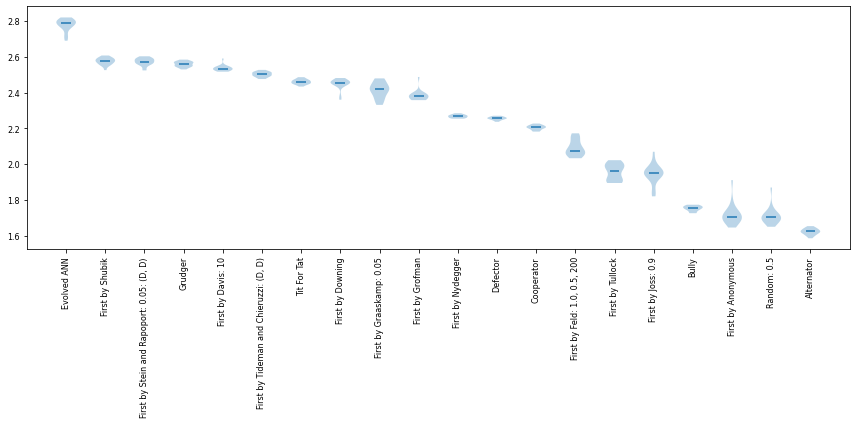

In [2]:
plot = axl.Plot(results)
plot.boxplot();

The first thing to point out is that there's a subtle difference between Axelrod's scoring system and the prisoner's dilemma. Whilst the prisoner's dilemma focuses on years in prison, Axelrod's scoring measures utility (which represents the motivation of players). Intuitively it follows that more years in prison means less utility. It is interesting to see that, in fact, tit-for-tat doesn't win in this tournament. It can be concluded that the tit-for-tat strategy isn't necessarily the best strategy for every context, however it has been concluded to be the most successful strategy thus far.

<h2>A Deeper Look into Tit-For-Tat</h2>

<h3>Definite Iteration</h3>

We can study how the tit-for-tat strategy works in an infinitely repeated prisoner's dilemma game. From now on we'll be using Axelrod's scoring system of utility rather than years in prison. Below are matrices chosen with arbitrary values:
$$A = \begin{bmatrix} 5 & 1 \\ 8 & 2 \end{bmatrix} B = \begin{bmatrix} 5 & 8 \\ 1 & 2 \end{bmatrix} $$
So in essence:
- If A and B defect, they will both have a utility of **2**
- If A defects and B cooperates, then A will get a utility of **8** and B will get a utility of **1**.
- Similarly, if A cooperates and B defects, then A will get a utility of **1** and B will get a utility  of **8**.
- If A and B co-operate, they will both get a utility of **5**.

<i><b>Note:</b> The position of "defect" and "cooperate" values have switched, and hence look different from the first pair of matrices introduced at the beginning because we're now using Axelrod's scoring system. Again, we can alternatively use a payoff matrix to display the same information:</i>
<table>
<thead>
<tr>
<th>  </th>
<th>C</th>
<th>D</th>
</tr>
</thead>
<tbody>
<tr>
<td>C</td>
<td>5,5</td>
<td>1,8</td>
</tr>
<tr>
<td>D</td>
<td>8,1</td>
<td>2,2</td>
</tr>
</tbody>
</table>


We know that the tit-for-tat strategy copies what the other player previously chooses. Let's assume player A and player B cooperate by playing strategy (5,5). This gives the following payoff for player A:
$$5 + 5\delta + 5\delta^2 + 5\delta^3...,$$
where $\delta$ is the discount factor

The discount factor is used to model time preferences. Since these players interact repeatedly over time, a concept called discounting is used to show that future payoffs are less valuable. This is because generally consumption in the future is less valuable than consumption now. One could also apply the prisoner's dilemma in the context of money, where money in the future is worth less due to positive interest rates. The discount factor can also be considered as some probability $\delta$ that the game ends in the next period. 

Future payoffs are discounted exponentially at some rate $\delta \in [0, 1)$ - anything above 1 would suggest that utility in the future is worth more than utility now (and hence an infinite sum would diverge). Likewise, anything below or equal to 0 would suggest that utility in the future is worthless.

From the above we get a geometric series that sums to:
$$\frac{5}{1 - \delta}$$

Now if player B decides to start with defecting, we get an alteration of outcomes where the strategy loops through (1, 8) and (8, 1) repeatedly (as tit-for-tat copies the previous move of the other player). Therefore, for player A's payoff, we would get a series equating to:
$$8 + \delta + 8\delta^2 +\delta^3 + 8\delta^4 + \delta^5...,$$
This could be rewritten as the sum of two infinite geometric series, and hence is equivalent to:
$$8 + 8\delta^2 + 8\delta^4 + 8\delta^6... + \delta + \delta^3 + \delta^5 + \delta^7...,$$
And so we can consider them as two separate sums:
$$\frac{8}{1-\delta^2} + \frac{\delta}{1-\delta^2}$$

Using these two geometric series, we can show whether the player should continue cooperating or defecting depending on the value of the discount factor:
$$\frac{5}{1-\delta} \geq \frac{8}{1-\delta^2} + \frac{\delta}{1-\delta^2}$$
$$\frac{5}{1-\delta} \geq \frac{8 + \delta}{1-\delta^2}$$
$$1-\delta^2 \times \frac{5}{1-\delta} \geq 8 + \delta$$
$$(1 + \delta) \times 5 \geq 8 + \delta$$
$$5 + 5\delta \geq 8 + \delta$$
$$5\delta \geq 3 + \delta$$
$$\delta \geq \frac{3}{4}$$
So continue cooperating if $\delta \geq \frac{3}{4} $ otherwise, defect.


We can also prove that cooperation is possible with more/less patience by adjusting the value of utility for cooperating/defecting. For example, let's reduce the incentive to defect to get a different payoff matrix of:
<table>
<thead>
<tr>
<th>  </th>
<th>C</th>
<th>D</th>
</tr>
</thead>
<tbody>
<tr>
<td>C</td>
<td>5,5</td>
<td>1,6</td>
</tr>
<tr>
<td>D</td>
<td>6,1</td>
<td>2,2</td>
</tr>
</tbody>
</table>

And by applying the same algebra before we can then conclude that player A continues cooperating if $\delta \geq \frac{1}{4}$.

How about if we increase the incentive to defect **and** reduce the incentive to cooperate?

<table>
<thead>
<tr>
<th>  </th>
<th>C</th>
<th>D</th>
</tr>
</thead>
<tbody>
<tr>
<td>C</td>
<td>3,3</td>
<td>1,9</td>
</tr>
<tr>
<td>D</td>
<td>9,1</td>
<td>2,2</td>
</tr>
</tbody>
</table>

Then we get $\delta \geq 3$, but this wouldn't work as our constraint pointed out that $\delta \in [0, 1)$. This suggests that the incentive to defect is so large that it always makes sense to defect no matter the value of the discount factor. This also does make sense intuitively - player A has the potential to lose a utility of 1 if he chooses to cooperate, but has the potential to gain a utility of 6 if he chooses to defect.